In [1]:
import pandas as pd
import os

FILE_NAME = 'global_bleaching_environmental.csv'
DATA_PATH = 'data/'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, skiprows=6)

load_data()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,-9999.0,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,-9999.0,-9999.0,-9999.0
1,3467,10324754,Donner,-17.5750,-149.7833,Pacific,-9999.0,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,-9999.0
2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,-9999.0,-9999.0,-9999.0
3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,-9999.0,-9999.0,-9999.0
4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,15446,10310562,Reef_Check,-8.3651,116.0844,Pacific,116.5.3.9E.8.21.54.4S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.09,1.49,9.00,0.63,2019-05-28,-9999.0,-9999.0,-9999.0
41357,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-16,-9999.0,-9999.0,-9999.0
41358,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-16,-9999.0,-9999.0,-9999.0
41359,15457,10310536,Reef_Check,-8.3445,116.0629,Pacific,116.3.46.548E.8.20.40.236S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-29,-9999.0,-9999.0,-9999.0


In [4]:
reefs_data = load_data()
reefs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                41361 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41361 non-null  object 
 9   Country_Name                           41361 non-null  object 
 10  State_Island_Province_Name             41361 non-null  object 
 11  Ci

In [13]:
reefs_data['Ocean_Name'].value_counts()

Pacific         21896
Atlantic        14592
Indian           3054
Red Sea          1381
Arabian Gulf      438
Name: Ocean_Name, dtype: int64

In [14]:
reefs_data.describe()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,...,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
count,4.136100e+04,4.136100e+04,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,...,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000,41361.000000
mean,7.455816e+04,1.012880e+07,7.558085,34.966127,3761.099309,-1.383411,52.159650,16.037402,6.902686,2007.796765,...,-29.120116,-33.792022,-33.747942,-30.117148,-23.659664,-30.829907,-34.578453,-30.475361,-21.336904,-31.322011
std,2.520418e+05,1.373151e+06,15.732185,103.404598,13550.425039,120.424097,7.589593,7.837400,2.875063,6.073043,...,564.132857,563.868713,597.190277,564.076144,564.457992,564.038678,597.142757,564.056847,564.604977,564.008562
min,1.000000e+00,9.623000e+03,-30.262500,-179.974300,-9999.000000,-9999.000000,18.310000,1.000000,1.000000,1980.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,3.502000e+03,1.031108e+07,-4.902500,-78.385600,124.740000,0.033400,47.940000,10.000000,5.000000,2003.000000,...,2.250000,-2.630000,0.000000,1.270000,5.750000,0.000000,0.000000,0.920000,6.900000,0.280000
50%,5.925000e+03,1.031628e+07,10.776100,96.843300,457.520000,0.052200,50.920000,15.000000,7.000000,2007.000000,...,2.560000,-1.490000,1.000000,1.600000,7.000000,1.000000,0.000000,1.180000,9.150000,0.400000
75%,8.368000e+03,1.032149e+07,20.050500,120.880400,1785.540000,0.079400,55.730000,22.000000,9.000000,2013.000000,...,3.050000,-1.220000,3.000000,2.110000,9.330000,1.000000,1.150000,1.640000,12.300000,0.620000
max,1.000060e+06,1.033171e+07,36.750000,179.964500,299218.500000,1.284500,105.800000,31.000000,12.000000,2020.000000,...,13.450000,0.000000,29.000000,16.390000,52.000000,20.000000,52.450000,24.770000,146.800000,13.150000


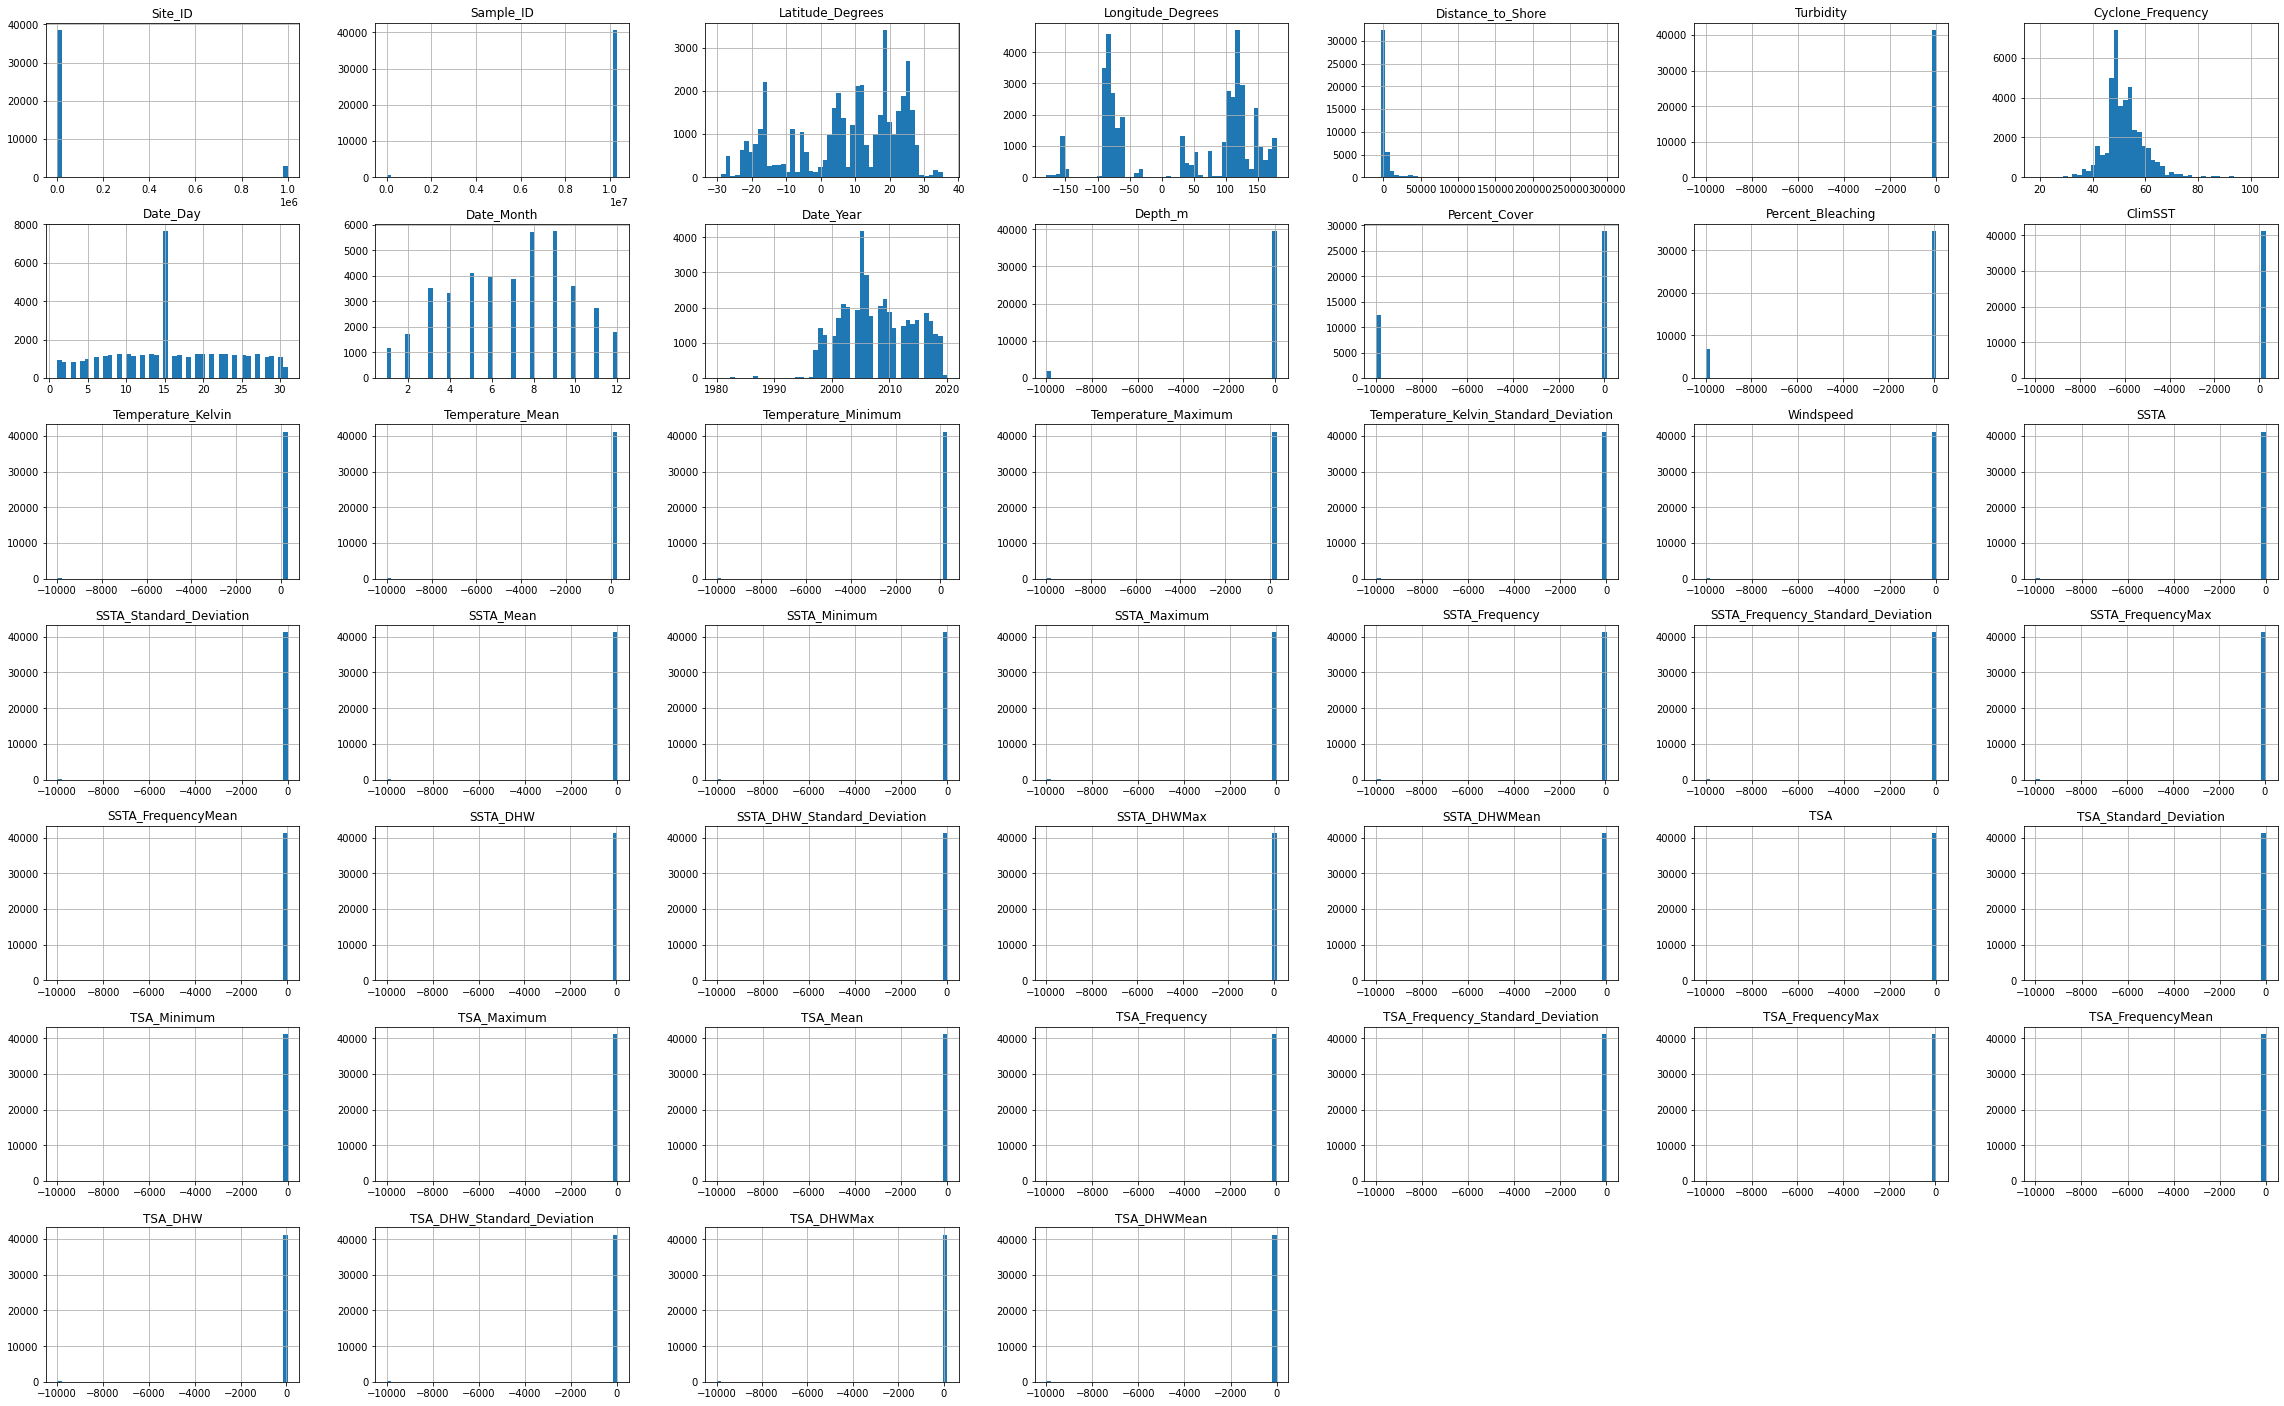

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

reefs_data.hist(bins=50, figsize=(40, 25))
plt.show()
